In [33]:
library(locfit)
library(ggplot2)
options(stringsAsFactors = FALSE)

In [7]:
ballbyball <- read.csv('master_data/odi_ballinfotrim.csv')

In [8]:
ballbyball$date <- as.Date(ballbyball$date, format="%Y-%m-%d")
ballbyball <- ballbyball[order(ballbyball$date, ballbyball$game_id),]

In [9]:
head(ballbyball)

,game_id,innings,batting_side,over_number,ball_in_over,inn_runs,inn_wickets,date,match_winner,bat_win,balls_left,pct_balls_left,pct_wickets_left,chase_total,runs_to_chase
466508,289107,1st innings,Asia XI,0,1,1,0,2007-06-06,Asia XI,1,299,0.9966667,1,NA,NA
466509,289107,1st innings,Asia XI,0,2,2,0,2007-06-06,Asia XI,1,298,0.9933333,1,NA,NA
466510,289107,1st innings,Asia XI,0,3,7,0,2007-06-06,Asia XI,1,297,0.99,1,NA,NA
466511,289107,1st innings,Asia XI,0,4,8,0,2007-06-06,Asia XI,1,296,0.9866667,1,NA,NA
466512,289107,1st innings,Asia XI,0,5,8,0,2007-06-06,Asia XI,1,295,0.9833333,1,NA,NA
466513,289107,1st innings,Asia XI,0,6,8,0,2007-06-06,Asia XI,1,294,0.98,1,NA,NA


In [10]:
inn1 <- ballbyball[ballbyball$innings %in% '1st innings',]
inn2 <- ballbyball[ballbyball$innings %in% '2nd innings',]

In [11]:
# train on 2009 to 2012 games
train_inn1 <- inn1[inn1$date < as.Date('2013-01-01',format='%Y-%m-%d'),]
train_inn2 <- inn2[inn2$date < as.Date('2013-01-01',format='%Y-%m-%d'),]

In [12]:
predict_inn1 <- inn1[inn1$date >= as.Date('2013-01-01',format='%Y-%m-%d'),]
predict_inn2 <- inn2[inn2$date >= as.Date('2013-01-01',format='%Y-%m-%d'),]

In [14]:
win_prob_inn1 <- locfit(bat_win ~
                        inn_runs +
                        inn_wickets +
                        balls_left +
                        pct_balls_left +
                        pct_wickets_left,
                        family = 'binomial',
                        data = train_inn1)

In [16]:
win_prob_inn2 <- locfit(bat_win ~
                        inn_runs +
                        inn_wickets +
                        balls_left +
                        pct_balls_left +
                        pct_wickets_left +
                        runs_to_chase,
                        family = 'binomial',
                        data = train_inn2)

eig_dec not converged
eig_dec not converged
eig_dec not converged
eig_dec not converged
eig_dec not converged
eig_dec not converged
eig_dec not converged
eig_dec not converged
eig_dec not converged
eig_dec not converged
eig_dec not converged


In [17]:
summary(win_prob_inn1)

Estimation type: Local Likelihood - Binomial 

Call:
locfit(formula = bat_win ~ inn_runs + inn_wickets + balls_left + 
    pct_balls_left + pct_wickets_left, data = train_inn1, family = "binomial")

Number of data points:  169777 
Independent variables:  inn_runs inn_wickets balls_left pct_balls_left pct_wickets_left 
Evaluation structure: Rectangular Tree 
Number of evaluation points:  184 
Degree of fit:  2 
Fitted Degrees of Freedom:  14.496 

In [18]:
summary(win_prob_inn2)

Estimation type: Local Likelihood - Binomial 

Call:
locfit(formula = bat_win ~ inn_runs + inn_wickets + balls_left + 
    pct_balls_left + pct_wickets_left + runs_to_chase, data = train_inn2, 
    family = "binomial")

Number of data points:  147126 
Independent variables:  inn_runs inn_wickets balls_left pct_balls_left pct_wickets_left runs_to_chase 
Evaluation structure: Rectangular Tree 
Number of evaluation points:  792 
Degree of fit:  2 
Fitted Degrees of Freedom:  25.558 

In [20]:
predictions_inn1 <- predict(win_prob_inn1, newdata = predict_inn1, se = TRUE, type = 'response')
predictions_inn2 <- predict(win_prob_inn2, newdata = predict_inn2, se = TRUE, type = 'response')

In [21]:
predict_inn1$win_prob <- predictions_inn1$fit
predict_inn1$moe <- predictions_inn1$se.fit
predict_inn2$win_prob <- (1-predictions_inn2$fit)
predict_inn2$moe <- predictions_inn2$se.fit

In [22]:
all_predict <- rbind(predict_inn1, predict_inn2)
all_predict <- all_predict[order(all_predict$game_id, all_predict$innings),]

In [23]:
indvsa <- all_predict[all_predict$game_id %in% 656423,]

In [24]:
head(indvsa)

,game_id,innings,batting_side,over_number,ball_in_over,inn_runs,inn_wickets,date,match_winner,bat_win,balls_left,pct_balls_left,pct_wickets_left,chase_total,runs_to_chase,win_prob,moe
484131,656423,1st innings,India,0,1,0,0,2015-02-22,India,1,299,0.9966667,1,NA,NA,0.4840028,0.01937684
484132,656423,1st innings,India,0,2,0,0,2015-02-22,India,1,298,0.9933333,1,NA,NA,0.4782394,0.01898684
484133,656423,1st innings,India,0,3,0,0,2015-02-22,India,1,297,0.99,1,NA,NA,0.4724555,0.01864155
484134,656423,1st innings,India,0,4,0,0,2015-02-22,India,1,296,0.9866667,1,NA,NA,0.4666514,0.01834247
484135,656423,1st innings,India,0,5,0,0,2015-02-22,India,1,295,0.9833333,1,NA,NA,0.4608276,0.01809081
484136,656423,1st innings,India,0,6,0,0,2015-02-22,India,1,294,0.98,1,NA,NA,0.4549849,0.01788745


In [29]:
indvsa[290:310,]

,game_id,innings,batting_side,over_number,ball_in_over,inn_runs,inn_wickets,date,match_winner,bat_win,balls_left,pct_balls_left,pct_wickets_left,chase_total,runs_to_chase,win_prob,moe
484420,656423,1st innings,India,47,1,284,5,2015-02-22,India,1,17,0.05666667,0.5,NA,NA,0.7483549,0.02713491
484421,656423,1st innings,India,47,2,284,6,2015-02-22,India,1,16,0.05333333,0.4,NA,NA,0.7378359,0.02742629
484422,656423,1st innings,India,47,3,288,6,2015-02-22,India,1,15,0.05,0.4,NA,NA,0.7500582,0.02928561
484423,656423,1st innings,India,47,4,292,6,2015-02-22,India,1,14,0.04666667,0.4,NA,NA,0.7619735,0.03129179
484424,656423,1st innings,India,47,5,296,6,2015-02-22,India,1,13,0.04333333,0.4,NA,NA,0.7735636,0.03344365
484425,656423,1st innings,India,47,6,297,6,2015-02-22,India,1,12,0.04,0.4,NA,NA,0.7745092,0.0336622
484426,656423,1st innings,India,47,7,297,6,2015-02-22,India,1,12,0.04,0.4,NA,NA,0.7745092,0.0336622
484427,656423,1st innings,India,48,1,298,6,2015-02-22,India,1,11,0.03666667,0.4,NA,NA,0.7753817,0.03388616
484428,656423,1st innings,India,48,2,299,6,2015-02-22,India,1,10,0.03333333,0.4,NA,NA,0.7761791,0.03411552
484429,656423,1st innings,India,48,3,299,6,2015-02-22,India,1,9,0.03,0.4,NA,NA,0.7734308,0.03369037


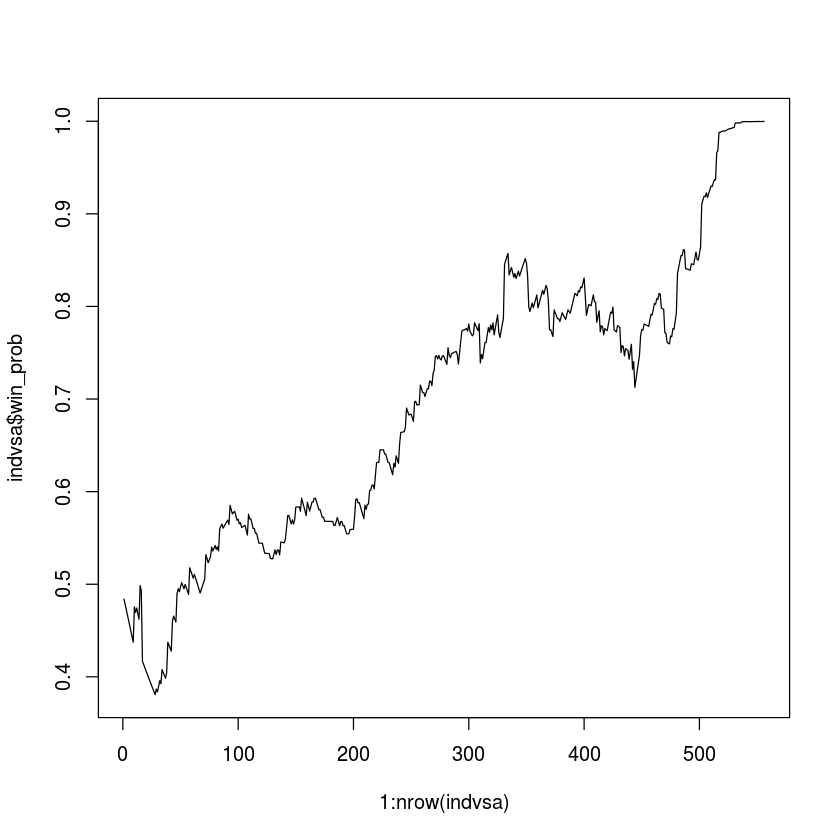

In [25]:
plot(1:nrow(indvsa), indvsa$win_prob, type = 'l')

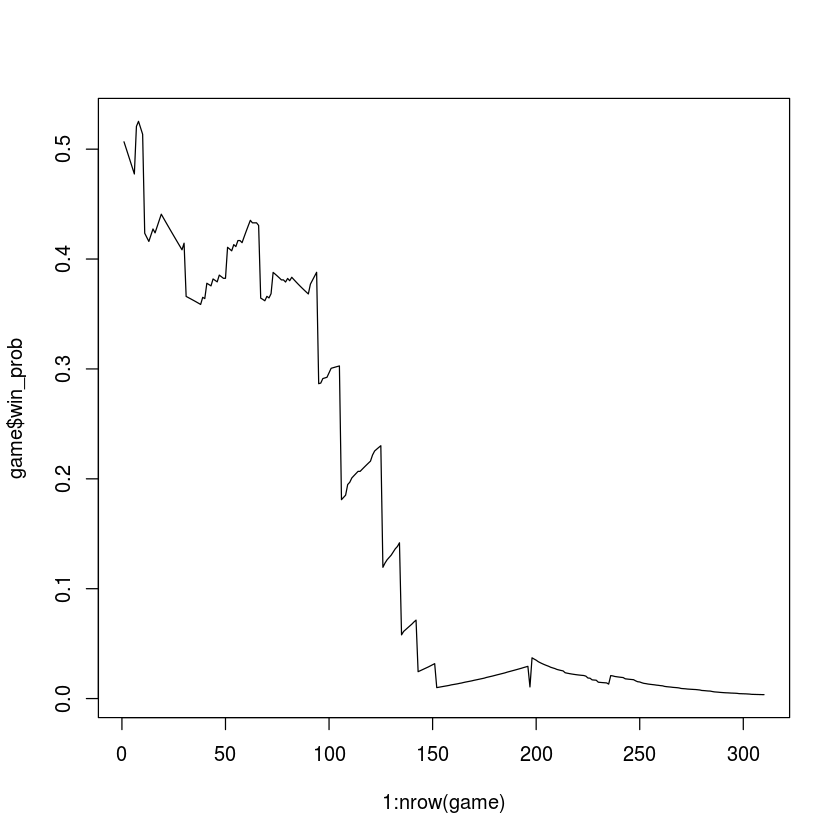

In [30]:
game <- all_predict[all_predict$game_id %in% 656439,]
plot(1:nrow(game), game$win_prob, type = 'l')

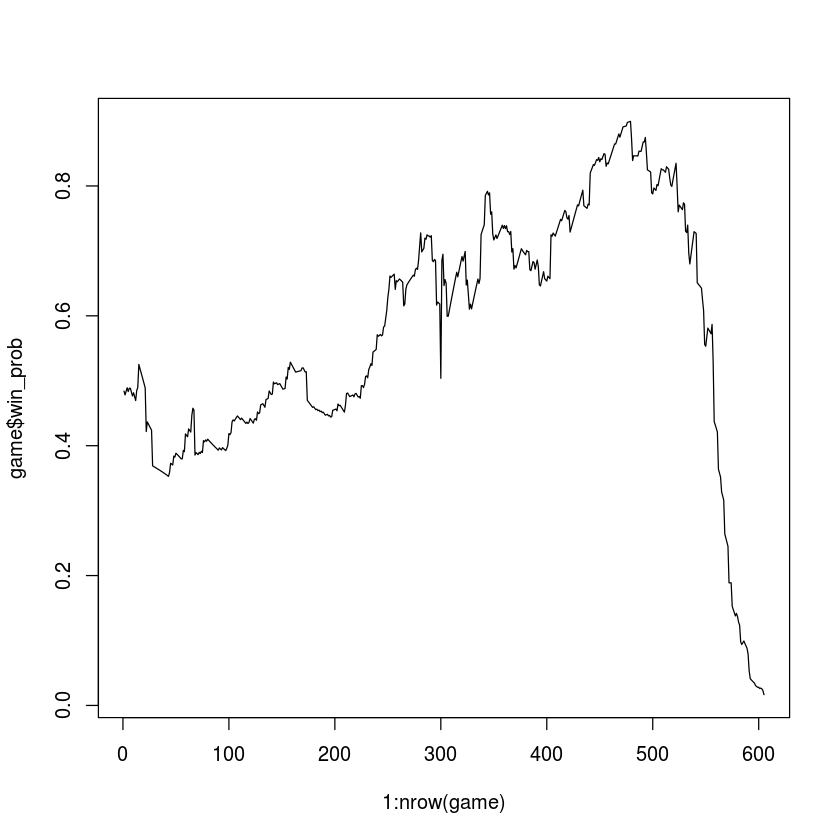

In [31]:
game <- all_predict[all_predict$game_id %in% 656475,]
plot(1:nrow(game), game$win_prob, type = 'l')